## Covid-19 Tweet Sentimental Analysis using Naive Bayes

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/misato/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("input/Corona_NLP_train.csv",encoding='latin1')
df = pd.DataFrame(data)

In [3]:
df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

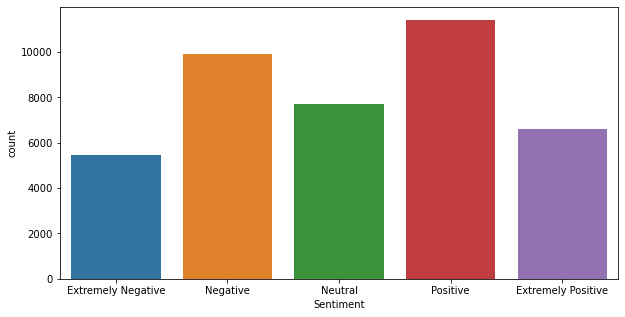

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sentiment', data=df, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'], )

In [5]:
# showing column wise %ge of NaN values they contains 

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)


UserName 	-	 0.0
ScreenName 	-	 0.0
Location 	-	 20.87129771363316
TweetAt 	-	 0.0
OriginalTweet 	-	 0.0
Sentiment 	-	 0.0


> Here  ___Location___ has some null values. Since location does not affects are model as we are not considering it as feature in analysis, we will leave it as it is.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


> Since our main columns for analysis "OriginalTweet" contains lots of unnecssary stuff like links, hashtags, mentions etc., we have to clean them and extract the content of tweet. For that I'm using regex and ommitting the perticular sequences which resembles links, hashtags, mentions.

In [7]:
a = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)")
tweet = []

for i in df["OriginalTweet"]:
  tweet.append(a.sub(" ", i))

df = pd.concat([df, pd.DataFrame(tweet, columns=["CleanedTweet"])], axis=1, sort=False)


In [8]:
df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

                                        CleanedTweet  
0                              Gahan     and   and    
1  advice Talk to your neighbours family to excha...  
2  Coronavirus Australia  Woolworths to give elde...  
3  My food stock is not the only one which is emp...  
4  Me  ready to go at supermarket during the   ou...

> Since we got our cleaned tweets, now we have to convert them in vectors for classifications.


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))     # Here making a set of stopwords (useless words which will not affect the classification)
vectoriser = TfidfVectorizer(stop_words=None)    # of English language do that can be removed while vectorization

In [10]:
X_train = vectoriser.fit_transform(df["CleanedTweet"])

In [11]:
# Encoding the classes in numerical values

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(df['Sentiment'])

In [12]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [14]:
# importing the Test dataset for prediction and testing purposes

test_data = pd.read_csv("input/Corona_NLP_test.csv",encoding='latin1')
test_df = pd.DataFrame(test_data)

In [15]:
test_df.head()

UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1  When I couldn't find hand sanitizer at Fred Me...            Positive  
2  Find out how you can protect yourself and love...  Extremely Positive  
3  #Panic buying hits #NewYork City as anxious sh...            Negative  
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral

In [16]:
# showing column wise %ge of NaN values they contains 

for i in test_df.columns:
  print(i,"\t-\t", test_df[i].isna().mean()*100)


UserName 	-	 0.0
ScreenName 	-	 0.0
Location 	-	 21.958925750394943
TweetAt 	-	 0.0
OriginalTweet 	-	 0.0
Sentiment 	-	 0.0


> Like training dataset, ignoring ___Location___ as it has no significance in classification

In [17]:
a = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)")
tweet = []

for i in test_df["OriginalTweet"]:
  tweet.append(a.sub(" ", i))

test_df = pd.concat([test_df, pd.DataFrame(tweet, columns=["CleanedTweet"])], axis=1, sort=False)


In [18]:
test_df.head()

UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  \
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative   
1  When I couldn't find hand sanitizer at Fred Me...            Positive   
2  Find out how you can protect yourself and love...  Extremely Positive   
3  #Panic buying hits #NewYork City as anxious sh...            Negative   
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral   

                                        CleanedTweet  
0  TRENDING  New Yorkers encounter empty supermar...  
1  When I couldn t find hand sanitizer at Fred Me...  
2  Find out how you can protect yourself and love...  
3    buying hits   City as anxious shoppers stock...  
4              19               One week everyone...

In [19]:
X_test = vectoriser.transform(test_df["CleanedTweet"])

In [20]:
y_test = encoder.transform(test_df["Sentiment"])

In [21]:
# Prediction

y_pred = classifier.predict(X_test)

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df.head()

Actual  Predicted
0       0          2
1       4          4
2       1          4
3       2          2
4       3          2

> Plotting ROC Curve (Receiver operating characteristic) for checking the accuracy of classifier.

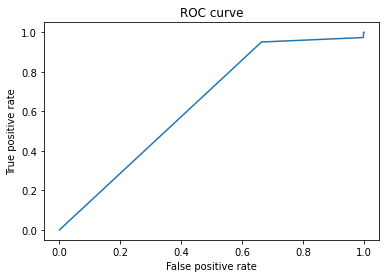

AUC of the predictions: 0.6389011382417605


In [22]:
from sklearn import metrics

# Generate the roc curve using scikit-learn.
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

# Measure the area under the curve.  The closer to 1, the "better" the predictions.
print("AUC of the predictions: {0}".format(metrics.auc(fpr, tpr)))

> Since we got 0.64 auc score for the classifier, we can say that the classifier (Naive Bayes) is not that good but acceptable. Since more neerer to 1 auc score, more better the classifier.